170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3690 - loss: 1.7076 - val_accuracy: 0.5760 - val_loss: 1.1697
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.5906 - loss: 1.1487 - val_accuracy: 0.5938 - val_loss: 1.1444
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6610 - loss: 0.9604 - val_accuracy: 0.6488 - val_loss: 1.0025
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7024 - loss: 0.8467 - val_accuracy: 0.6712 - val_loss: 0.9424
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7297 - loss: 0.7682 - val_accuracy: 0.6863 - val_loss: 0.9114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


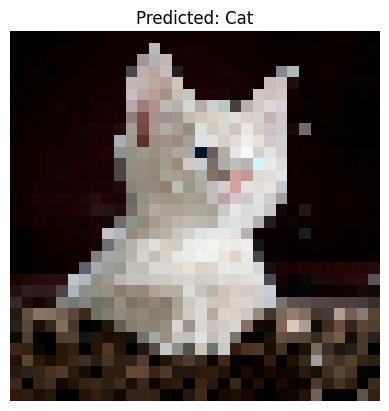

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import matplotlib.pyplot as plt

class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# 1. Load and Preprocess the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Define and Train the CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile and Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 3. Load a Custom Image
def predict_image(image_path):
    img = cv2.imread(image_path)  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (32, 32))  # Resize to match CIFAR-10
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # 4. Make Prediction
    prediction = model.predict(img)
    class_index = np.argmax(prediction)

    # 5. Show the Image and Prediction
    plt.imshow(img[0])
    plt.title(f"Predicted: {class_labels[class_index]}")
    plt.axis("off")
    plt.show()

# Example Usage
image_path = "/content/kitty-cat-kitten-pet-45201.jpeg"
predict_image(image_path)